# Project: No-show appointments



<img src="patient.jpg" alt="doctor and patient"
	title="Examiation" style="width:1400px; height:300px;" />

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
> This **dataset** collects information from about **100-thousand medical appointments** in Brazil. It includes 14 associated variables. Variable names are self-explanatory. The analysis is going around **the factors why patients may not show up for their appointments and how to make a prediction about that.** Analysis is done on **the correlations between (Diabetes, Handicap, Alcholism and Hipertension)** and **whether they are correlated with age or not.** Also, answering the quesion of **what patients with scholarships usually suffer from.** Data visualization methods ,such as; histograms and pie charts, are used for convenient analysis and communication. Also,clear and tidy tables are provided in the analysis and conclusion sections. 

>> - **Note**:
>>   - *ScheduledDay*: The day the patient set up their appointment.
>>   - *AppointmentDay*: The day of the actuall appointment, when they have to visit the doctor.
>>   - *Scholarship* (a broad topic) : a subsidy given for very low-income families and one of its requirements is to have their children going to school. For more information check the link: <A href="https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia"
       title="Go to Wikipedia.">Bolsa Família</A>. 

In [ ]:
#importing libraries for data analysis and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
%matplotlib inline 

<a id='wrangling'></a>
## Data Wrangling
### General Properties

In [1]:
#loading the data
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
# data inspection
df.head(6)

NameError: name 'pd' is not defined

- **At first glance:**
 - The data type of PatientId and AppointmentID is numeric.
 - The ScheduledDay and AppointmentDay are ambiguous.
 - No-show column has string data type

In [537]:
#the data shape
df.shape

(110527, 14)

In [538]:
#describe summary
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


- There is a negative value for the Age 
- Handcap column has a value of 4 

In [539]:
#looking for unreasonable data (Age)
df[df.Age<0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [540]:
#looking for unreasonable data (Handcap)
df[df.Handcap>1]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
946,7.282582e+13,5582483,M,2016-04-14T09:26:08Z,2016-04-29T00:00:00Z,94,BELA VISTA,0,1,1,0,2,1,No
1665,1.242919e+13,5525497,M,2016-03-30T09:16:41Z,2016-04-29T00:00:00Z,64,SANTA MARTHA,0,1,0,1,2,1,No
1666,1.242919e+13,5525498,M,2016-03-30T09:16:41Z,2016-04-29T00:00:00Z,64,SANTA MARTHA,0,1,0,1,2,0,No
2071,1.242919e+13,5640120,M,2016-04-29T10:08:48Z,2016-04-29T00:00:00Z,64,SANTA MARTHA,0,1,0,1,2,0,No
2091,1.491829e+13,5638626,F,2016-04-29T08:13:59Z,2016-04-29T00:00:00Z,11,ANDORINHAS,0,0,0,0,2,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108376,2.387212e+14,5756931,F,2016-06-01T08:48:28Z,2016-06-07T00:00:00Z,44,ROMÃO,0,1,1,0,2,1,No
109484,3.589495e+14,5752442,M,2016-05-31T11:45:57Z,2016-06-02T00:00:00Z,64,DA PENHA,0,1,1,0,2,0,No
109733,5.662976e+14,5772744,F,2016-06-03T16:11:00Z,2016-06-07T00:00:00Z,34,JUCUTUQUARA,0,0,0,0,2,1,No
109975,4.522185e+13,5766970,M,2016-06-02T16:07:36Z,2016-06-06T00:00:00Z,39,PRAIA DO SUÁ,1,0,0,0,2,1,No


In [541]:
#number of rows for ambiguous Handcap values
df[df.Handcap>1].shape[0]

199

We would drop those 199 rows

### Make sure that other categorial data is clean.

In [542]:
df["No-show"].unique()

array(['No', 'Yes'], dtype=object)

In [543]:

df["Gender"].unique()

array(['F', 'M'], dtype=object)

In [ ]:
#looking foe null-value cells
df.info()
# object = str

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


- There is no null value in the dataset
- The data type of ScheduledDay AppointmentDay is string

#### Search for duplicate rows

In [545]:
sum(df.duplicated())

0


#### Results for EDA:

    1- 32.1% of the patients recieved a reminder message
  
    2- Most patients are between 18 and 55 years old
    
 
    
    
    


|  <h3>Notes for cleaning</h3>    |  <h3> Process  </h3> |
|:------|:------|
| The data type of the two columns PatientId and AppointmentID are quantitative. |**Drop them anyway**|
| The data type of ScheduledDay and AppointmentDay is string(object)|**Convert to datetime data type**|
| The data of ScheduledDay or AppointmentDay doesn't provide much information individually | **Add a column with a comparison**|
| The datetime data type is not convenient in processing | **Add more column "Scheduled_DayOfWeek"**|
| There is a negative value in the age column | **Drop the row of negative values** |
| No-show column has string data type| **Replace "No" with False and "Yes" with True** |
|Handcap column has values greater than 1| **Drop the rows**|
| The column label : "No-show" is not convenient for coding| **Replace it with "No_show"**|

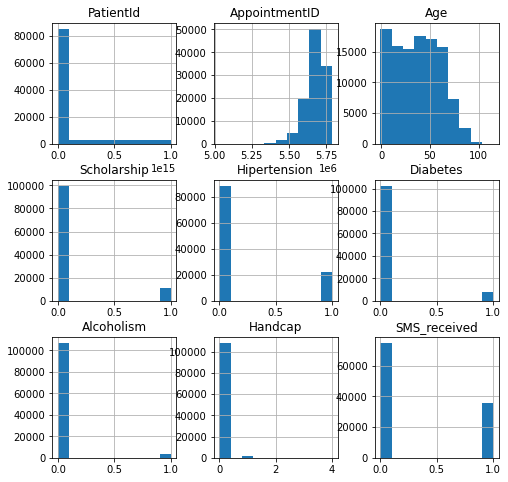

In [546]:
df.hist(figsize=(8,8));

### Dropping unreasonable data 

#### Drop rows with negative age values

In [547]:
df.drop(df[df.Age<0].index,inplace=True)

In [548]:
#check
sum(df[df.Age<0].index)

0

#### Drop rows with values greater than 1 for Handcap column

In [549]:
df.drop(df[df.Handcap>1].index,inplace=True)

In [550]:
#check
sum(df[df.Handcap>1].index)

0

#### Drop extraneous columns

In [551]:
df.drop(['PatientId','AppointmentID'],axis=1,inplace=True)

In [552]:
#check
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [553]:
df.shape

(110327, 12)

### Replacing values and Renaming labels

#### Rename the column's label ("No-show") with ("No_show") and ("ScheduledDay") with ("RegisterationDay")

In [554]:
df.rename(columns={'No-show':'No_show','ScheduledDay':'RegistrationDay','Handcap':'Handicap'},inplace=True)

#### Replace "Yes" and "No" with boolean values

In [555]:
df.No_show=df.No_show.replace({'No':0,'Yes':1})

In [556]:
#check
df.No_show.unique()

array([0, 1], dtype=int64)

### Dealing with the datetime data

In [557]:
df.RegistrationDay = pd.to_datetime(df.RegistrationDay)
df.AppointmentDay = pd.to_datetime(df.AppointmentDay)
#reseting index
df.reset_index(drop=True, inplace=True)

In [558]:
#We add a column with the scheduled DayOfWeek that carries numeric values from 0 to 6; 0 is for Sunday
DayOfWeek=[]
for x in range (0,len(df.RegistrationDay)):
    y =df.RegistrationDay[x].strftime("%w")
    DayOfWeek.append(y)
df['Registration_DayOfWeek']=DayOfWeek


For Brazil the weekend days are Saturday 6 and Sunday 0

In [559]:
df.head()

,Gender,RegistrationDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,Registration_DayOfWeek
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0,5
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0,5
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0,5
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,5
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0,5


In [560]:
df[df.Registration_DayOfWeek==0]

,Gender,RegistrationDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,Registration_DayOfWeek


In [561]:
df[df.Registration_DayOfWeek==6]

,Gender,RegistrationDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,Registration_DayOfWeek


There is no appointment in weekends

In [562]:
df['WaitingPeriod']= df.AppointmentDay - df.RegistrationDay 

In [563]:
df['WaitingPeriod']=pd.to_timedelta(df.WaitingPeriod, errors='coerce').dt.days

In [564]:
df

,Gender,RegistrationDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,Registration_DayOfWeek,WaitingPeriod
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0,5,-1
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0,5,-1
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0,5,-1
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,5,-1
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0,5,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110322,F,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,0,0,0,0,0,1,0,2,34
110323,F,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,0,0,0,0,0,1,0,2,34
110324,F,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,0,0,0,0,0,1,0,3,40
110325,F,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,0,0,0,0,0,1,0,3,40


There is negative waiting period which is not realistic

In [565]:
dropped_periods=df[df.WaitingPeriod < 0]
dropped_periods

,Gender,RegistrationDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,Registration_DayOfWeek,WaitingPeriod
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0,5,-1
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0,5,-1
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0,5,-1
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,5,-1
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0,5,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110311,F,2016-06-08 08:50:20+00:00,2016-06-08 00:00:00+00:00,14,MARIA ORTIZ,0,0,0,0,0,0,0,3,-1
110312,F,2016-06-08 08:20:01+00:00,2016-06-08 00:00:00+00:00,41,MARIA ORTIZ,0,0,0,0,0,0,0,3,-1
110313,M,2016-06-08 07:52:55+00:00,2016-06-08 00:00:00+00:00,2,ANTÔNIO HONÓRIO,0,0,0,0,0,0,0,3,-1
110314,F,2016-06-08 08:35:31+00:00,2016-06-08 00:00:00+00:00,58,MARIA ORTIZ,0,0,0,0,0,0,0,3,-1


### Drop the rows with negative waiting periods

In [566]:
df.drop(dropped_periods.index,axis=0,inplace=True)

In [567]:
#check
sum(df[df.WaitingPeriod < 0].index)

0

<a id='eda'></a>
## Exploratory Data Analysis


### Q1: What factors affect the patients'showing up?

In [568]:
df.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,WaitingPeriod
count,71837.000000,71837.000000,71837.000000,71837.000000,71837.000000,71837.000000,71837.000000,71837.000000,71837.000000
mean,38.486504,0.092766,0.208486,0.074446,0.025266,0.016496,0.493269,0.285159,14.645252
std,22.916152,0.290106,0.406229,0.262498,0.156932,0.127373,0.499958,0.451493,16.496611
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
50%,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000
75%,57.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,21.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,178.000000


Average period between the registration and the appointment is about 15 days


#### Results :

    1- 49.3% of the patients recieved a reminder message
    
    2- 28.51% of the patients didn't show up
  
    3- Most patients are between 19 and 57 years old
    
    4- Average period between the registration and the appointment is about 15 days
    
    5- Most patients wait for 3 to 8 days
    
    
    
    
    
 
    
    
    


In [569]:
#Masking data for patients that show up for their appointments and patients don't
Show_up = df[df.No_show==0]
No_show = df[df.No_show==1]

#### Does SMS_received correlate with the No-show?

In [570]:
Show_up.SMS_received.mean()

0.49968842498831595

In [571]:
No_show.SMS_received.mean()

0.47717842323651455

#### Results :

    1- 49.96% of the patients who showed up recieved a reminder message
    
    2- 47.71% of the patients who didn't show up recieved a reminder message
  
   
    

It seems that there is no a strong correlation

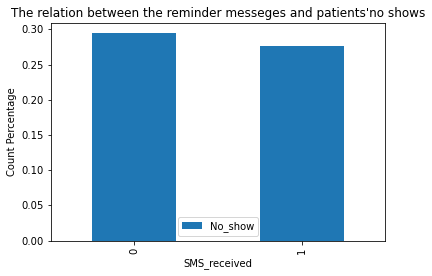

In [572]:
# No_show.SMS_received.plot(kind='bar',alpha=0.5,bins=3,label='No show');
df.groupby('SMS_received').No_show.mean().plot(kind='bar');
plt.ylabel('Count Percentage');
plt.title("The relation between the reminder messeges and patients'no shows");
plt.legend();

Maybe it is related to age for not being awaring of SMS 

In [573]:
Show_up_reminded=Show_up[Show_up.SMS_received==1]

In [574]:
No_show_reminded=No_show[No_show.SMS_received==1]

In [575]:
Show_up_reminded.Age.mean()

38.87634450506625

In [576]:
No_show_reminded.Age.mean()

33.88593350383632

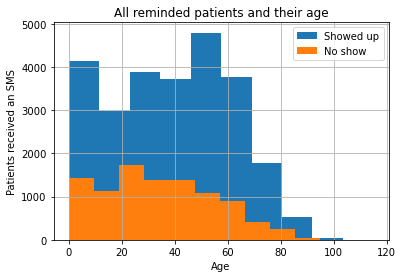

In [577]:
Show_up_reminded.Age.hist(label='Showed up');
No_show_reminded.Age.hist(label='No show');
plt.xlabel('Age')
plt.ylabel('Patients received an SMS')
plt.title("All reminded patients and their age")
plt.legend();

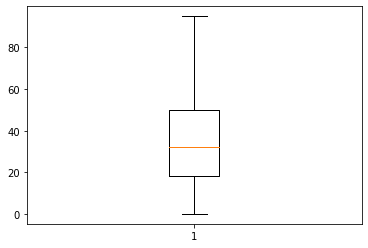

In [578]:
plt.boxplot(No_show_reminded.Age);

Find a correlation with Alcoholism and masked group of reminded patients with No shows

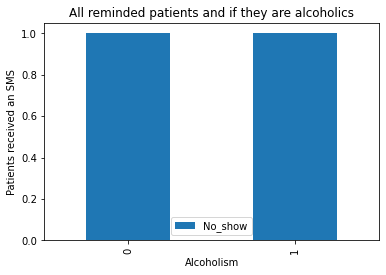

In [579]:
# Show_up_reminded.Alcoholism.plot(kind='bar',label='Showed up');
# No_show_reminded.Alcoholism.plot(kind='bar',label='No show');
No_show_reminded.groupby('Alcoholism').No_show.mean().plot(kind='bar');

plt.xlabel('Alcoholism')
plt.ylabel('Patients received an SMS')
plt.title("All reminded patients and if they are alcoholics")
plt.legend();

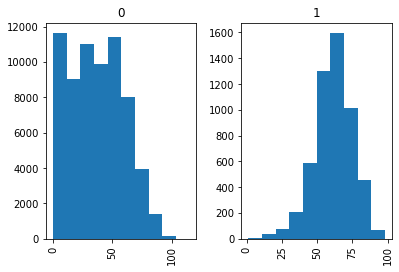

In [580]:
df.Age.hist(df.Diabetes);

#### Does Age correlate with the No-show?

In [581]:
Show_up.Age.mean()

39.95628213117308

In [582]:
No_show.Age.mean()

34.80205028069319

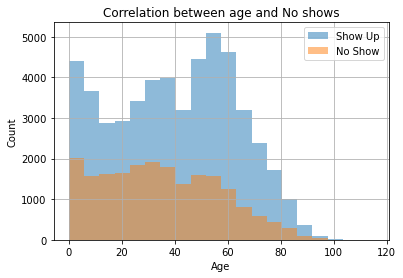

In [583]:
Show_up.Age.hist(alpha=0.5,bins=20,label='Show Up');
No_show.Age.hist(alpha=0.5,bins=20,label='No Show');
plt.title("Correlation between age and No shows")
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend();

Poor relation!

#### Does Scholarship correlate with the No-show?

In [584]:
Show_up.Scholarship.mean()

0.08435893441346004

In [585]:
No_show.Scholarship.mean()

0.11383939467903344

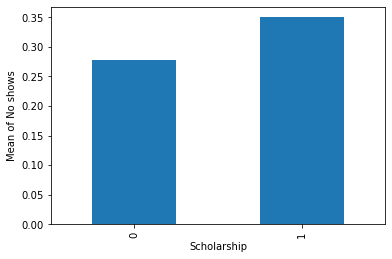

In [586]:
df.groupby('Scholarship').No_show.mean().plot(kind='bar');
plt.ylabel("Mean of No shows");

It seems that people with scholarships are more likely to not show up for their appointments

#### Does waiting period correlate with the No-show?

In [587]:
Show_up.WaitingPeriod.mean()

14.018305031936439

In [588]:
No_show.WaitingPeriod.mean()

16.216890407615328

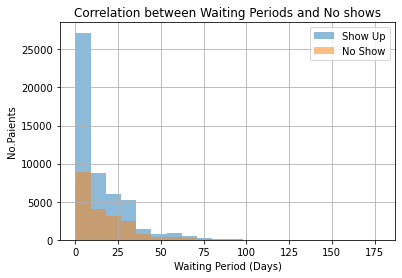

In [589]:
Show_up.WaitingPeriod.hist(alpha=0.5,bins=20,label='Show Up');
No_show.WaitingPeriod.hist(alpha=0.5,bins=20,label='No Show');
plt.title('Correlation between Waiting Periods and No shows')
plt.xlabel('Waiting Period (Days)')
plt.ylabel('No.Paients')
plt.legend();

People with short waiting periods are more likely to show up

#### Does Diabetes, Alcoholism, Handicap or Hipertension correlate with the No-show?

In [590]:
df.groupby('Diabetes').No_show.mean()

Diabetes
0    0.288033
1    0.249439
Name: No_show, dtype: float64

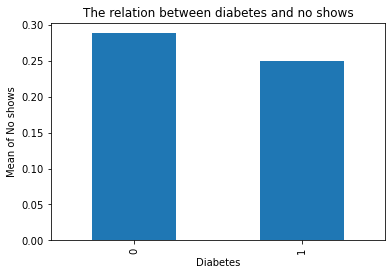

In [591]:
df.groupby('Diabetes').No_show.mean().plot(kind='bar');
plt.ylabel('Mean of No shows');
plt.title("The relation between diabetes and no shows");


In [592]:
df.groupby('Alcoholism').No_show.mean()

Alcoholism
0    0.283711
1    0.341047
Name: No_show, dtype: float64

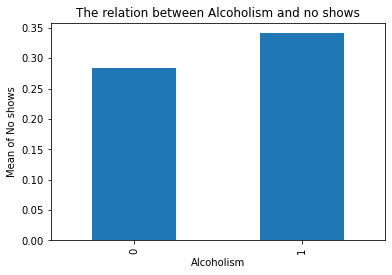

In [593]:
df.groupby('Alcoholism').No_show.mean().plot(kind='bar');
plt.ylabel('Mean of No shows');
plt.title("The relation between Alcoholism and no shows");



In [594]:
df.groupby('Handicap').No_show.mean()

Handicap
0    0.285739
1    0.250633
Name: No_show, dtype: float64

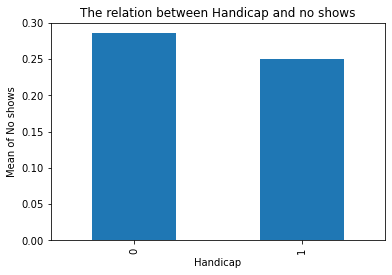

In [595]:
df.groupby('Handicap').No_show.mean().plot(kind='bar');
plt.ylabel('Mean of No shows');
plt.title("The relation between Handicap and no shows");


#### Does Neighbourhood correlate with the No-show?

In [596]:
df.Neighbourhood.value_counts()

JARDIM CAMBURI                 5213
MARIA ORTIZ                    3730
RESISTÊNCIA                    2814
JARDIM DA PENHA                2652
ITARARÉ                        2375
                               ... 
PONTAL DE CAMBURI                41
ILHA DO BOI                      23
ILHA DO FRADE                     8
AEROPORTO                         5
ILHAS OCEÂNICAS DE TRINDADE       2
Name: Neighbourhood, Length: 80, dtype: int64

In [597]:
df.Neighbourhood.value_counts().median()

641.0

In [598]:
df.Neighbourhood.value_counts().describe()

count      80.00000
mean      897.96250
std       887.70842
min         2.00000
25%       278.50000
50%       641.00000
75%      1359.50000
max      5213.00000
Name: Neighbourhood, dtype: float64

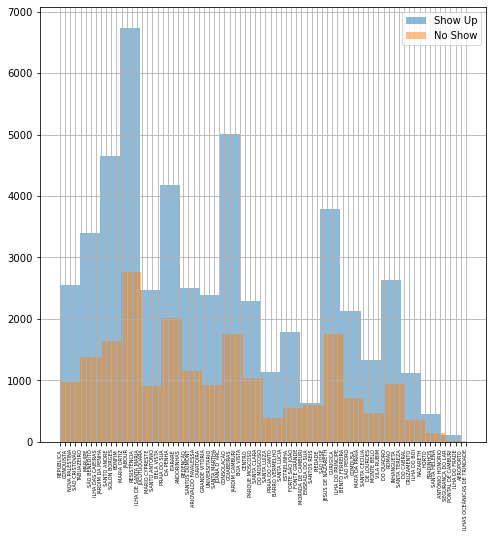

In [599]:
Show_up.Neighbourhood.hist(alpha=0.5,bins=20,label='Show Up',figsize=(8,8));
No_show.Neighbourhood.hist(alpha=0.5,bins=20,label='No Show',figsize=(8,8));
plt.xticks(fontsize=5,rotation=90)
plt.legend();

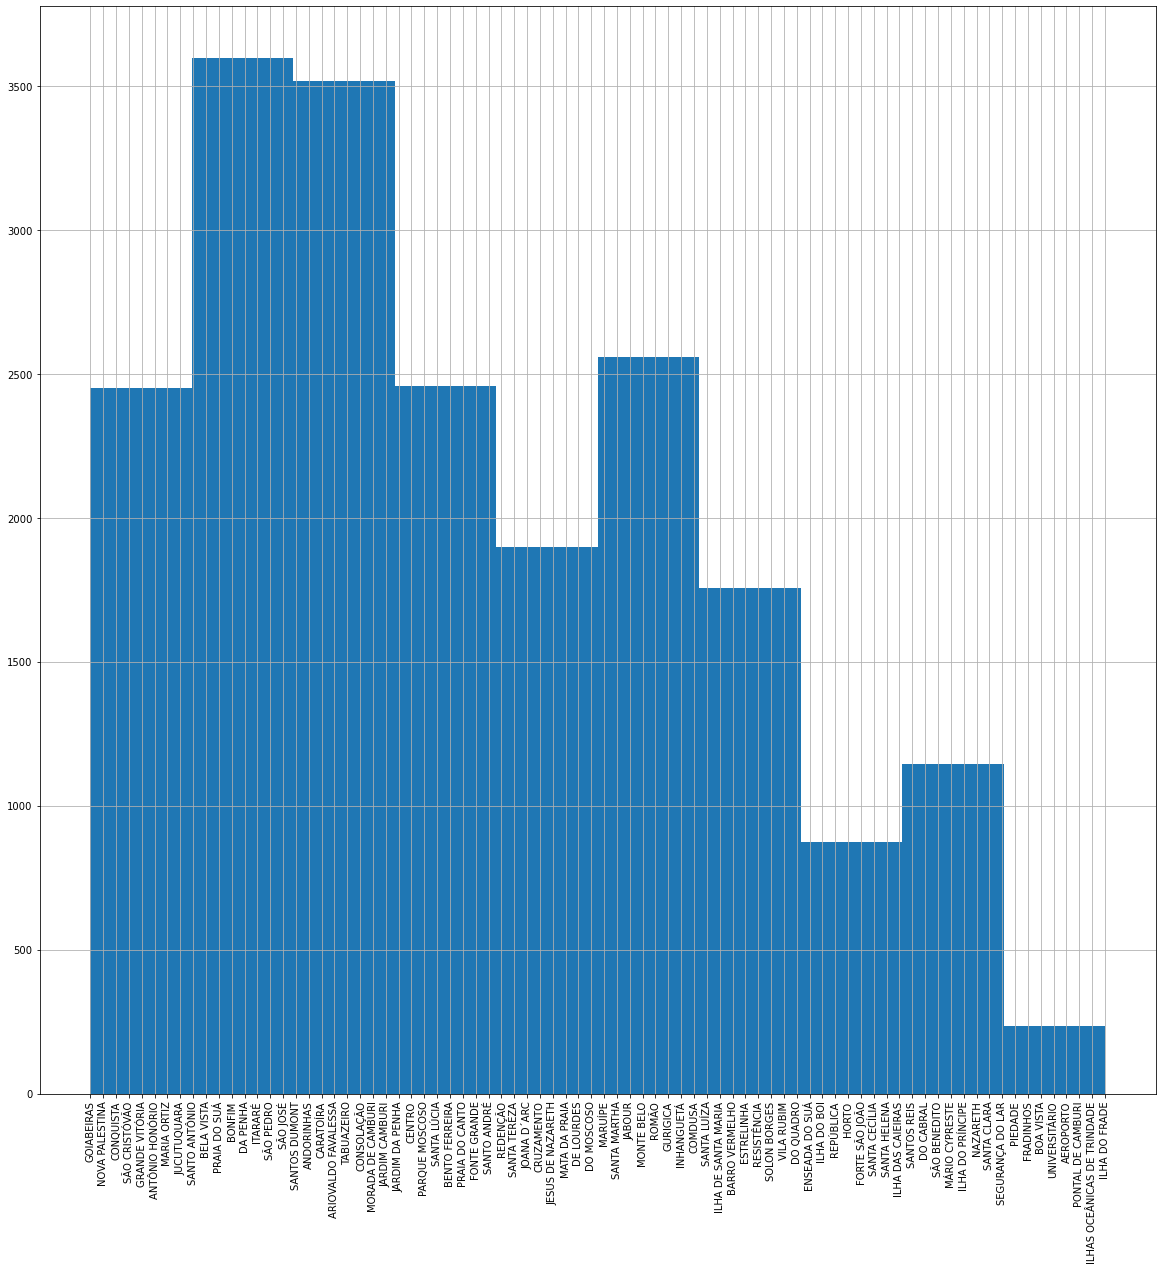

In [600]:
No_show.Neighbourhood.hist(bins=10,label='No Show',figsize=(20,20));
plt.xticks(fontsize=10,rotation=90);


It is still not clear 

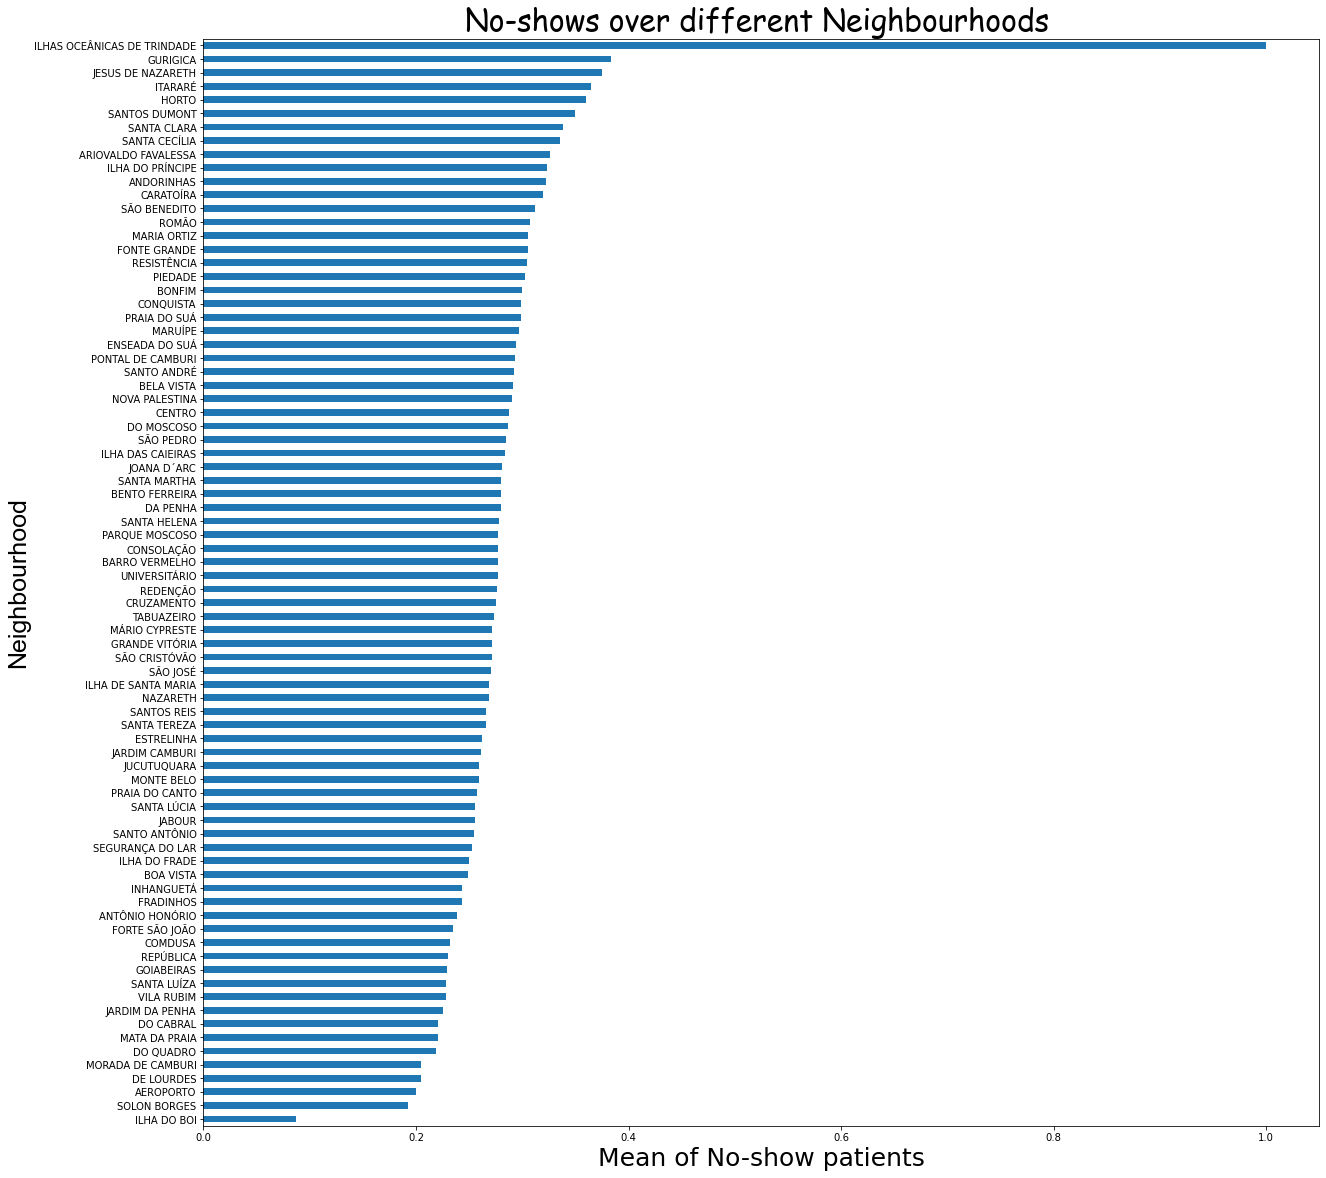

In [601]:
ax = df.groupby('Neighbourhood')['No_show'].mean().sort_values().plot(kind='barh',figsize=(20,20));
ax.set_xlabel("Mean of No-show patients",fontsize=25);
ax.set_ylabel("Neighbourhood", fontname="Arial", fontsize=25);
ax.set_title("No-shows over different Neighbourhoods ", fontname='Comic Sans MS', fontsize=30);


In [602]:
df.groupby('Neighbourhood')['No_show'].mean().sort_values()

Neighbourhood
ILHA DO BOI                    0.086957
SOLON BORGES                   0.192878
AEROPORTO                      0.200000
DE LOURDES                     0.204545
MORADA DE CAMBURI              0.205128
                                 ...   
HORTO                          0.359649
ITARARÉ                        0.365053
JESUS DE NAZARETH              0.374929
GURIGICA                       0.383710
ILHAS OCEÂNICAS DE TRINDADE    1.000000
Name: No_show, Length: 80, dtype: float64

So all patients from ILHAS OCEÂNICAS DE TRINDADE don't show up for their aapointment.
According to 
<A href="https://www.google.com/maps/place/Trindade+Island/@-20.5071455,-29.3583158,13z/data=!3m1!4b1!4m5!3m4!1s0x135049e4943087d:0x2bdbf1e86691e27!8m2!3d-20.5080654!4d-29.3308425"
       title="Trindade Island">Google Map</A> and 
<A href="https://en.wikipedia.org/wiki/Trindade_and_Martin_Vaz"
       title="Trindade and Martin Vaz">wikipedia</A> , ILHAS OCEÂNICAS DE TRINDADE (Trindade Island) is an archipelago located in the South Atlantic Ocean about 1,100 kilometres (680 miles) east of the coast of the Brazilian state of Espírito Santo

In [603]:
df[df.Neighbourhood=='ILHAS OCEÂNICAS DE TRINDADE'].count()[0]

2

- It seems that the mean of No shows for ILHAS OCEÂNICAS DE TRINDADEit doesn't affect that much on data and we don't have enough amount of data to make a prediction of No-show 
- However, it seems that people from this island don't set medical appointments for some reasons such as; there are not many people living there anyway.


#### Removing the outliers

In [604]:
dropped_outliers=df[df.Neighbourhood=='ILHAS OCEÂNICAS DE TRINDADE']
df.drop(dropped_outliers.index,axis=0,inplace=True)

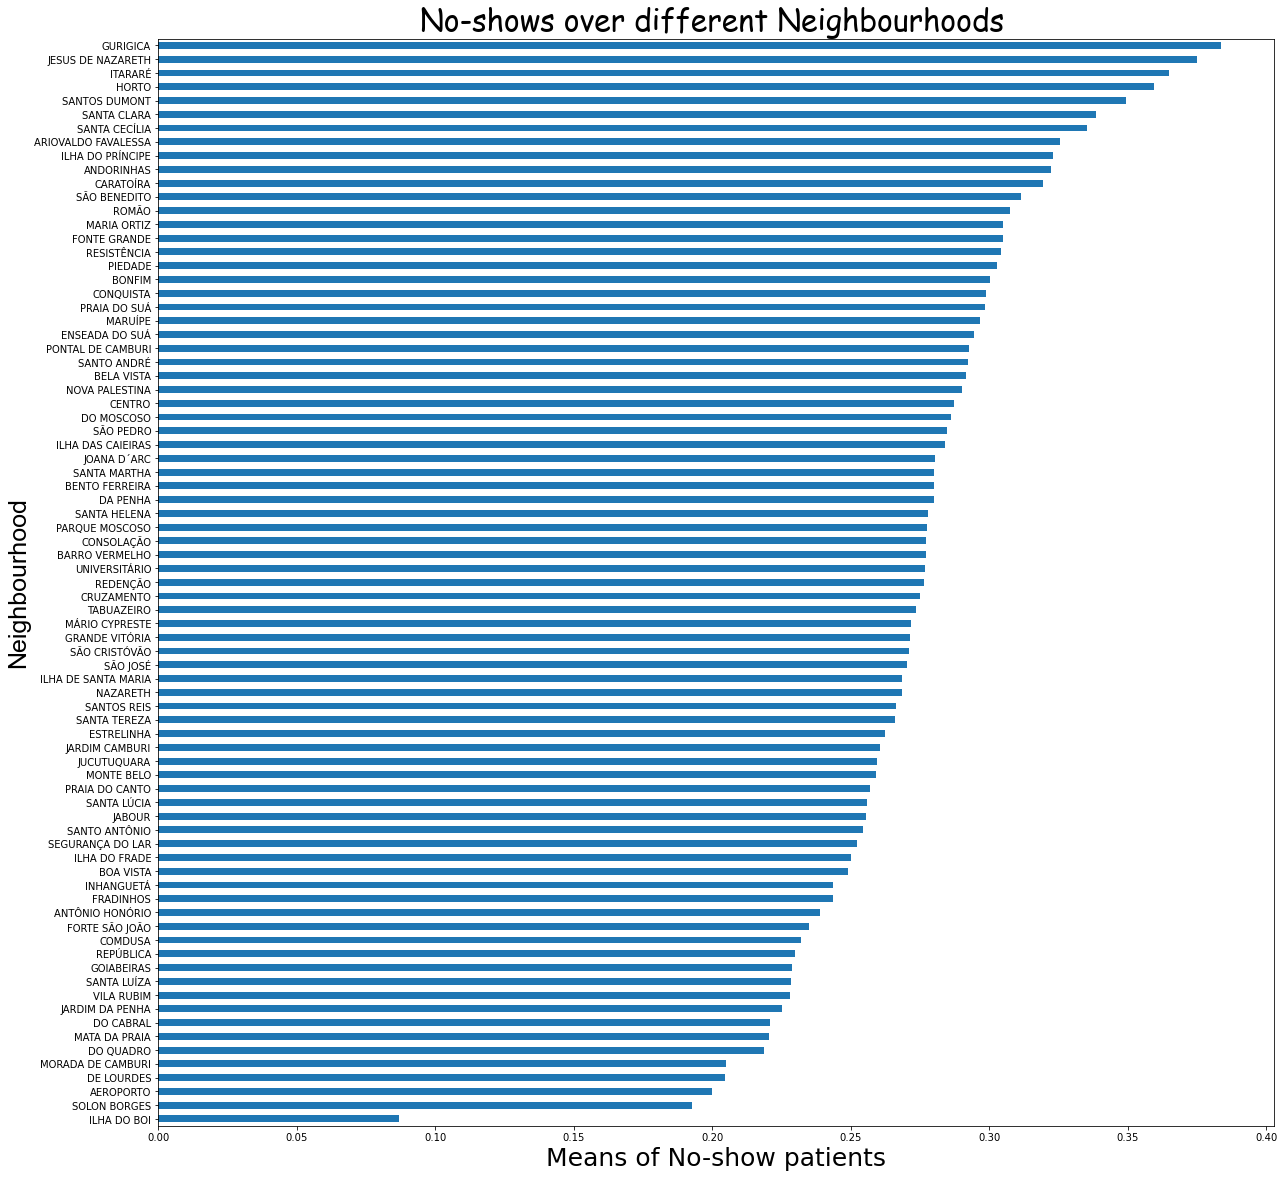

In [605]:
ax = df.groupby('Neighbourhood')['No_show'].mean().sort_values().plot(kind='barh',figsize=(20,20));
ax.set_xlabel("Means of No-show patients",fontsize=25);
ax.set_ylabel("Neighbourhood", fontname="Arial", fontsize=25);
ax.set_title("No-shows over different Neighbourhoods ", fontname='Comic Sans MS', fontsize=30);

In [606]:
df.groupby('Neighbourhood')['No_show'].mean().sort_values()

Neighbourhood
ILHA DO BOI          0.086957
SOLON BORGES         0.192878
AEROPORTO            0.200000
DE LOURDES           0.204545
MORADA DE CAMBURI    0.205128
                       ...   
SANTOS DUMONT        0.349315
HORTO                0.359649
ITARARÉ              0.365053
JESUS DE NAZARETH    0.374929
GURIGICA             0.383710
Name: No_show, Length: 79, dtype: float64

In [607]:
df[df.Neighbourhood=='GURIGICA'].shape[0]

1105

In [608]:
GURIGICA=df[df.Neighbourhood=='GURIGICA']
GURIGICA.groupby('No_show')['Scholarship'].mean()

No_show
0    0.180617
1    0.250000
Name: Scholarship, dtype: float64

In [609]:
df[df.Neighbourhood=='JESUS DE NAZARETH'].shape[0]


1755

In [610]:
df[df.Neighbourhood=='ILHA DO BOI'].shape[0]


23

In [611]:
df[df.Neighbourhood=='ITARARÉ'].shape[0]/df.shape[0]


0.033061877914665555

In [612]:
ILHA_DO_BOI=df[df.Neighbourhood=='ILHA DO BOI']
ILHA_DO_BOI.groupby('No_show')['Scholarship'].mean()

No_show
0    0
1    0
Name: Scholarship, dtype: int64

### Q: How diseases correlate with each other and with poverty and location?

We turn back the outliers of loacation to make an analysis of the diseases

In [613]:
df = pd.concat([df,dropped_outliers])

In [614]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71837 entries, 5 to 48679
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   Gender                  71837 non-null  object             
 1   RegistrationDay         71837 non-null  datetime64[ns, UTC]
 2   AppointmentDay          71837 non-null  datetime64[ns, UTC]
 3   Age                     71837 non-null  int64              
 4   Neighbourhood           71837 non-null  object             
 5   Scholarship             71837 non-null  int64              
 6   Hipertension            71837 non-null  int64              
 7   Diabetes                71837 non-null  int64              
 8   Alcoholism              71837 non-null  int64              
 9   Handicap                71837 non-null  int64              
 10  SMS_received            71837 non-null  int64              
 11  No_show                 71837 non-null  i

In [615]:
No_hiper=df[df['Hipertension']==1]
No_d=No_hiper[No_hiper['Diabetes']==1]
No_d

,Gender,RegistrationDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,Registration_DayOfWeek,WaitingPeriod
44,F,2016-04-28 13:27:27+00:00,2016-04-29 00:00:00+00:00,78,SÃO CRISTÓVÃO,0,1,1,0,0,0,1,4,0
47,F,2016-04-28 08:51:26+00:00,2016-04-29 00:00:00+00:00,39,MARUÍPE,0,1,1,0,0,0,0,4,0
73,F,2016-04-06 18:12:38+00:00,2016-04-29 00:00:00+00:00,68,REPÚBLICA,0,1,1,0,0,1,0,3,22
112,F,2016-04-18 11:05:04+00:00,2016-04-29 00:00:00+00:00,59,SANTO ANTÔNIO,0,1,1,0,0,1,0,1,10
127,M,2016-04-08 10:14:36+00:00,2016-04-29 00:00:00+00:00,42,PRAIA DO SUÁ,0,1,1,0,0,1,0,5,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109951,M,2016-06-03 15:11:50+00:00,2016-06-07 00:00:00+00:00,64,SANTA MARTHA,0,1,1,0,0,1,0,5,3
109968,M,2016-06-01 08:42:49+00:00,2016-06-03 00:00:00+00:00,50,SANTO ANTÔNIO,0,1,1,1,0,0,1,3,1
110105,F,2016-05-31 12:22:13+00:00,2016-06-02 00:00:00+00:00,56,BENTO FERREIRA,0,1,1,0,0,0,0,2,1
110248,F,2016-06-01 07:56:41+00:00,2016-06-06 00:00:00+00:00,40,RESISTÊNCIA,0,1,1,0,0,1,0,3,4


#### Correlation between Hipertension and Diabetes

In [616]:
df.query('Diabetes == 1')['Hipertension'].sum()

4369

In [617]:
Hip_dia=df.query('Diabetes == 1')['Hipertension'].mean()
d = {"Hipertension Average": [Hip_dia, 1-Hip_dia]}
f = pd.DataFrame(data=d)
f

,Hipertension Average
0,0.816941
1,0.183059


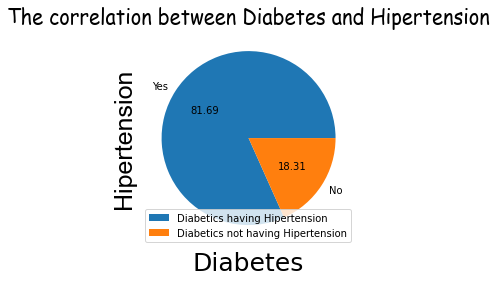

In [618]:
a=f.plot(kind='pie', autopct='%.2f' ,labels=['Yes','No'],subplots=True);
plt.xlabel("Diabetes",fontsize=25);
plt.ylabel("Hipertension", fontname="Arial", fontsize=25);
plt.title("The correlation between Diabetes and Hipertension", fontname='Comic Sans MS', fontsize=20);
plt.legend(loc=3, labels=['Diabetics having Hipertension','Diabetics not having Hipertension']);

- Diabetics are most likely to have hipertension
- 81.69% of diabetics suffer from hipertension


In [619]:
Hip_dia=df.query('Hipertension == 1')['Diabetes'].mean()
d = {"Diabetes Average": [Hip_dia, 1-Hip_dia]}
f = pd.DataFrame(data=d)
f

,Diabetes Average
0,0.291714
1,0.708286


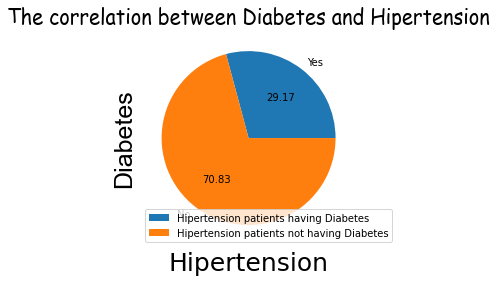

In [621]:
a=f.plot(kind='pie', autopct='%.2f' ,labels=['Yes','No'],subplots=True);
plt.xlabel("Hipertension",fontsize=25);
plt.ylabel("Diabetes", fontname="Arial", fontsize=25);
plt.title("The correlation between Diabetes and Hipertension", fontname='Comic Sans MS', fontsize=20);
plt.legend(loc=3, labels=['Hipertension patients having Diabetes','Hipertension patients not having Diabetes']);

#### Correlation between Hipertension and Alcoholism

In [622]:
Hip_alc=df.query('Alcoholism == 1')['Hipertension'].mean()
d = {"Hipertension Average": [Hip_alc, 1-Hip_alc]}
f = pd.DataFrame(data=d)
f

,Hipertension Average
0,0.425344
1,0.574656


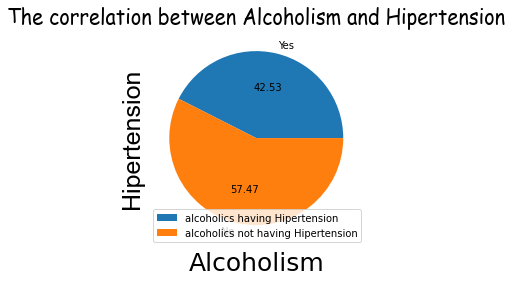

In [623]:
a=f.plot(kind='pie', autopct='%.2f' ,labels=['Yes','No'],subplots=True);
plt.xlabel("Alcoholism",fontsize=25);
plt.ylabel("Hipertension", fontname="Arial", fontsize=25);
plt.title("The correlation between Alcoholism and Hipertension", fontname='Comic Sans MS', fontsize=20);
plt.legend(loc=3, labels=['alcoholics having Hipertension','alcoholics not having Hipertension']);

42.53% of paients who suffer from alcoholism suffer from Hipertension

In [624]:
Hip_alc=df.query('Hipertension == 1')['Alcoholism'].mean()
d = {"Alcoholism Average": [Hip_alc, 1-Hip_alc]}
f = pd.DataFrame(data=d)
f

,Alcoholism Average
0,0.051546
1,0.948454


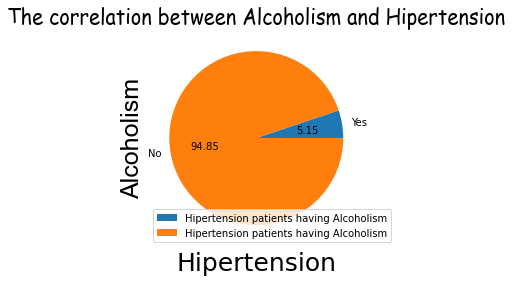

In [625]:
a=f.plot(kind='pie', autopct='%.2f' ,labels=['Yes','No'],subplots=True);
plt.xlabel("Hipertension",fontsize=25);
plt.ylabel("Alcoholism", fontname="Arial", fontsize=25);
plt.title("The correlation between Alcoholism and Hipertension", fontname='Comic Sans MS', fontsize=20);
plt.legend(loc=3, labels=['Hipertension patients having Alcoholism','Hipertension patients having Alcoholism']);

5.15% of hipertension patients are alcoholics

#### Correlation between Handicap and Alcoholism

In [626]:
Hand_alc=df.query('Handicap == 1')['Alcoholism'].mean()
d = {"alcoholics Average": [Hand_alc, 1-Hand_alc]}
f = pd.DataFrame(data=d)
f

,alcoholics Average
0,0.036287
1,0.963713


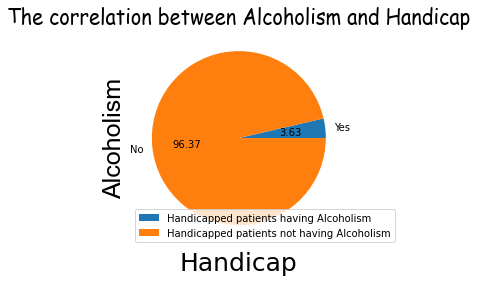

In [627]:
a=f.plot(kind='pie', autopct='%.2f' ,labels=['Yes','No'],subplots=True);
plt.xlabel("Handicap",fontsize=25);
plt.ylabel("Alcoholism", fontname="Arial", fontsize=25);
plt.title("The correlation between Alcoholism and Handicap", fontname='Comic Sans MS', fontsize=20);
plt.legend(loc=3, labels=['Handicapped patients having Alcoholism','Handicapped patients not having Alcoholism']);

96.37% of handicapped patients don't get alcohol

In [628]:
Hand_alc=df.query('Alcoholism == 1')['Handicap'].mean()
d = {"Handicapped Average": [Hand_alc, 1-Hand_alc]}
f = pd.DataFrame(data=d)
f

,Handicapped Average
0,0.023691
1,0.976309


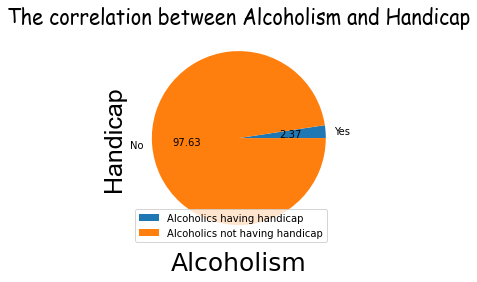

In [629]:
a=f.plot(kind='pie', autopct='%.2f' ,labels=['Yes','No'],subplots=True);
plt.xlabel("Alcoholism",fontsize=25);
plt.ylabel("Handicap", fontname="Arial", fontsize=25);
plt.title("The correlation between Alcoholism and Handicap", fontname='Comic Sans MS', fontsize=20);
plt.legend(loc=3, labels=['Alcoholics having handicap','Alcoholics not having handicap']);

2.37% of alcoholics having a handicap

#### Correlation between Diabetes and Alcoholism

In [630]:
Dia_alc=df.query('Diabetes == 1')['Alcoholism'].mean()
d = {"Alcoholics Average": [Dia_alc, 1-Dia_alc]}
f = pd.DataFrame(data=d)
f

,Alcoholics Average
0,0.038706
1,0.961294


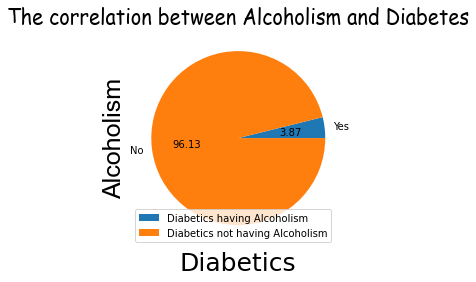

In [631]:
a=f.plot(kind='pie', autopct='%.2f' ,labels=['Yes','No'],subplots=True);
plt.xlabel("Diabetics",fontsize=25);
plt.ylabel("Alcoholism", fontname="Arial", fontsize=25);
plt.title("The correlation between Alcoholism and Diabetes", fontname='Comic Sans MS', fontsize=20);
plt.legend(loc=3, labels=['Diabetics having Alcoholism','Diabetics not having Alcoholism']);

3.87% of Diabetics suffer from alcoholism

In [632]:
Dia_alc=df.query('Alcoholism == 1')['Diabetes'].mean()
d = {"Diabetes Average": [Dia_alc, 1-Dia_alc]}
f = pd.DataFrame(data=d)
f

,Diabetes Average
0,0.11405
1,0.88595


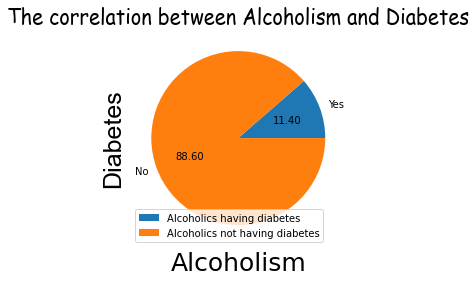

In [633]:
a=f.plot(kind='pie', autopct='%.2f' ,labels=['Yes','No'],subplots=True);
plt.xlabel("Alcoholism",fontsize=25);
plt.ylabel("Diabetes", fontname="Arial", fontsize=25);
plt.title("The correlation between Alcoholism and Diabetes", fontname='Comic Sans MS', fontsize=20);
plt.legend(loc=3, labels=['Alcoholics having diabetes','Alcoholics not having diabetes']);

11.4% of alcoholics suffer from diabetes

## Limitations

- Many data was removed for being inaccurate and illogic. However, removing data leads for smaller size of the sample.
- There are several treatments for inaccurate data other than removing:
    - Using Machine Learning
    - Backward or Forward expectation
- For neighborhoods , no specific reason can be determined for the no shows; it could relate with the transporation,communication, climate change ...etc. (Supplying distances will make the data more powerful.
- The no data provided about being paients living individually or getting health care and observed by someone which can give other factor of the no show and make an dependency.

<a id='conclusions'></a>
## Conclusions


### Factors of the No show:
  - Scholarship:  people without scholarships are more likely show up for their appointments (It may relate to poverty )
    - 11.38% of people with no shows have the scholarship.  
    - 8.44% of people who showed up have the scholarship.
   
  - Waiting periods: is an effective factor on the no show , that people who waits for more than two week more likely to miss their appointment and it is relative to the total number of patients who have the same appointment date.
  
  - Age: has a poor effect , however, young people are majority for the no shows.
  
  - Neighborhood: it is an effective factor however there is no enough information:
     - Most patients with no shows are from HORTO, ITARARÉ, JESUS DE NAZARETH, GURIGICA,...
 
  
### Are diabetics more likely to have hipertension?
- Diabetics are most likely to have hipertension
- 81.69% of diabetics suffer from hipertension

### Are alcoholics more likely to have hipertension?
- 42.53% of paients who suffer from alcoholism suffer from Hipertension
- 5.15% of hipertension patients are alcoholics

### Are Handicapped patients less likely to have alcoholism?
- 96.37% of handicapped patients don't get alcohol
- 2.37% of alcoholics  having a handicap

### Are diabetics more likely to have alcoholism?
- 3.87% of Diabetics suffer from alcoholism
- 11.4% of alcoholics suffer from diabetes.


  